<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [69]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [71]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


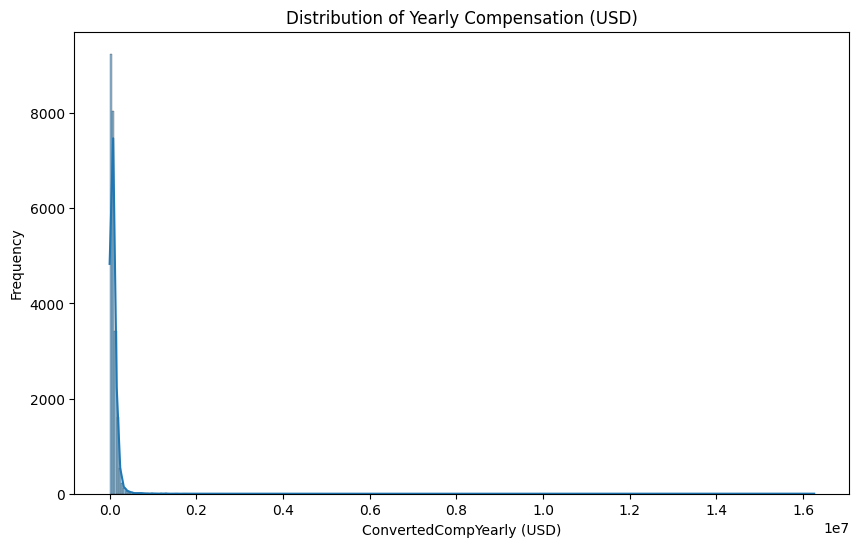

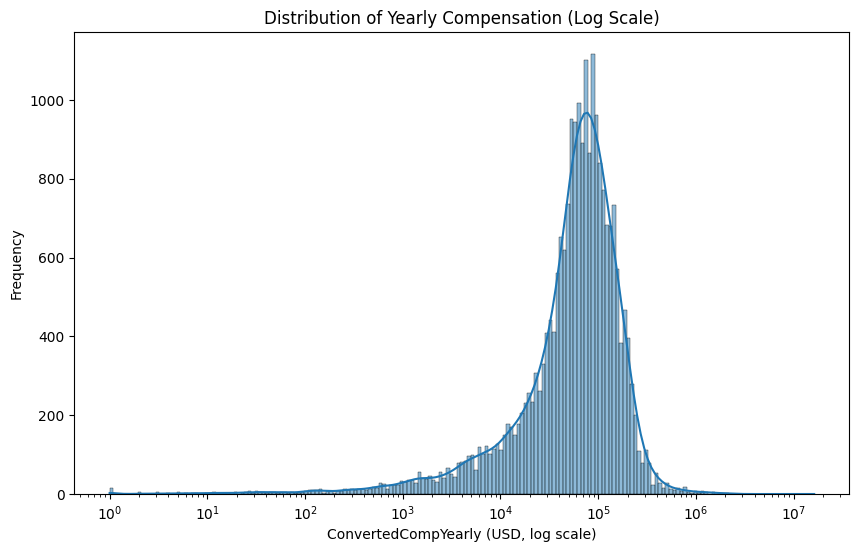


    On the linear scale, compensation values are heavily compressed near zero due to extreme high-income outliers,
    Applying a log scale spreads the values across orders of magnitued, revealing a more bell shaped distribution
    centered around $100,000. The log transfromation makes it easier to visually interpret the most common compensation ranges.
    


In [72]:
## Write your code here
plt.figure(figsize=(10,6))
sns.histplot(df['ConvertedCompYearly'],kde=True)
plt.title('Distribution of Yearly Compensation (USD)')
plt.xlabel('ConvertedCompYearly (USD)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['ConvertedCompYearly'],kde=True, log_scale=True)
plt.title('Distribution of Yearly Compensation (Log Scale)')
plt.xlabel('ConvertedCompYearly (USD, log scale)')
plt.ylabel('Frequency')
plt.show()

print(
    """
    On the linear scale, compensation values are heavily compressed near zero due to extreme high-income outliers,
    Applying a log scale spreads the values across orders of magnitued, revealing a more bell shaped distribution
    centered around $100,000. The log transfromation makes it easier to visually interpret the most common compensation ranges.
    """
)

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [73]:
## Write your code here
#print(df['Employment'].value_counts())
print(df['ConvertedCompYearly'].isna().sum())
# filter data
full_time_df = df[df['Employment'] == 'Employed, full-time']
#full_time_df.head()

# calculate mean compensation
mean_full_time_comp = full_time_df['ConvertedCompYearly'].mean()
print(f'Mean Yearly compensation for full-time employed respondents: ${mean_full_time_comp:.2f}')


42002
Mean Yearly compensation for full-time employed respondents: $88921.11


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



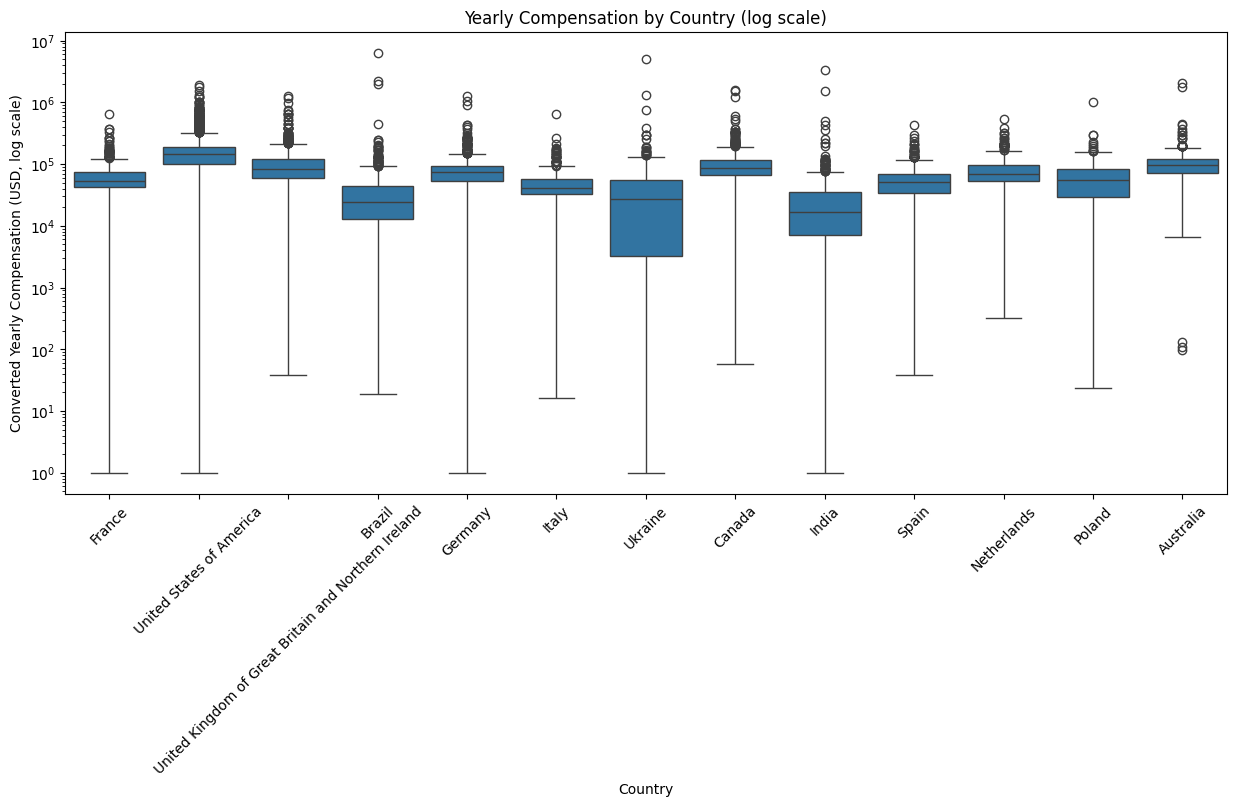

In [74]:
## Write your code here
# 1. create df of comp / country , dropping NaN (42k dropped)
comp_country_df = df.dropna(subset=['ConvertedCompYearly', 'Country']).copy()

# 2. convert to Numeric ( should already be , just in case)
comp_country_df.loc[:, 'ConvertedCompYearly'] = pd.to_numeric(
    comp_country_df['ConvertedCompYearly'], errors='coerce'
)

# 3. Keep only postive values ( necessary for log scale)
comp_country_df = comp_country_df[comp_country_df['ConvertedCompYearly'] > 0]

# 4. filter countries with at least 500 responses (clean messiness)
country_counts = comp_country_df['Country'].value_counts()
top_count_countries = country_counts[country_counts >= 500].index
comp_country_df = comp_country_df[comp_country_df['Country'].isin(top_count_countries)]

# 5. Boxplot
plt.figure(figsize=(15,6))
sns.boxplot(
    x='Country',
    y='ConvertedCompYearly',
    data=comp_country_df
)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Yearly Compensation by Country (log scale)')
plt.xlabel('Country')
plt.ylabel('Converted Yearly Compensation (USD, log scale)')
plt.show()




<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [75]:
## Write your code here

# 1. drop missing
comp1 = df['ConvertedCompYearly'].dropna()

# 2. Compute quartiles
Q1 = comp1.quantile(0.25)
Q3 = comp1.quantile(0.75)
IQR = Q3 - Q1

# 3. compute outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Q1:{Q1}, Q3: {Q3}, IQR: {IQR}')
print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')

# Keep only rows within the IQR bounds

df_comp_no_outliers = df[
    (df['ConvertedCompYearly'] >= lower_bound) &
    (df['ConvertedCompYearly'] <= upper_bound)
].copy()

print('Original DataFrame size:', df.shape)
print('New DataFrame size(no outliers):', df_comp_no_outliers.shape)

#print(df_comp_no_outliers['ConvertedCompYearly'].min(), df_comp_no_outliers['ConvertedCompYearly'].max())
df_comp_no_outliers['ConvertedCompYearly'].describe()


Q1:32712.0, Q3: 107971.5, IQR: 75259.5
Lower bound: -80177.25, Upper bound: 220860.75
Original DataFrame size: (65437, 114)
New DataFrame size(no outliers): (22457, 114)


count     22457.000000
mean      71347.201897
std       51271.396445
min           1.000000
25%       32000.000000
50%       63694.000000
75%      101281.000000
max      220207.000000
Name: ConvertedCompYearly, dtype: float64

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.406993       -0.059643
WorkExp                         0.406993  1.000000       -0.032388
JobSatPoints_1                 -0.059643 -0.032388        1.000000


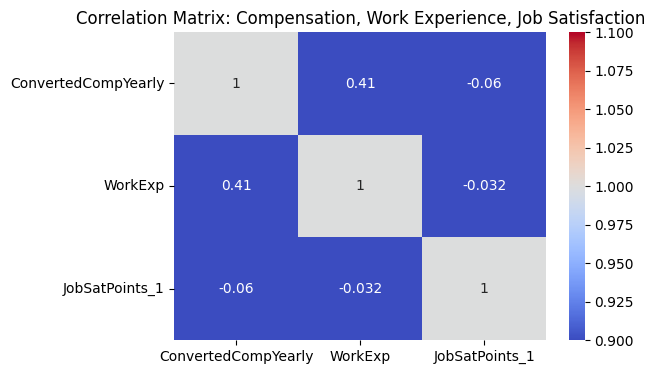

In [76]:
## Write your code here
corr_df = df_comp_no_outliers.dropna(subset=['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1'])
corr_matrix = corr_df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].corr()
print(corr_matrix)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=1, vmax=1)
plt.title('Correlation Matrix: Compensation, Work Experience, Job Satisfaction')
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


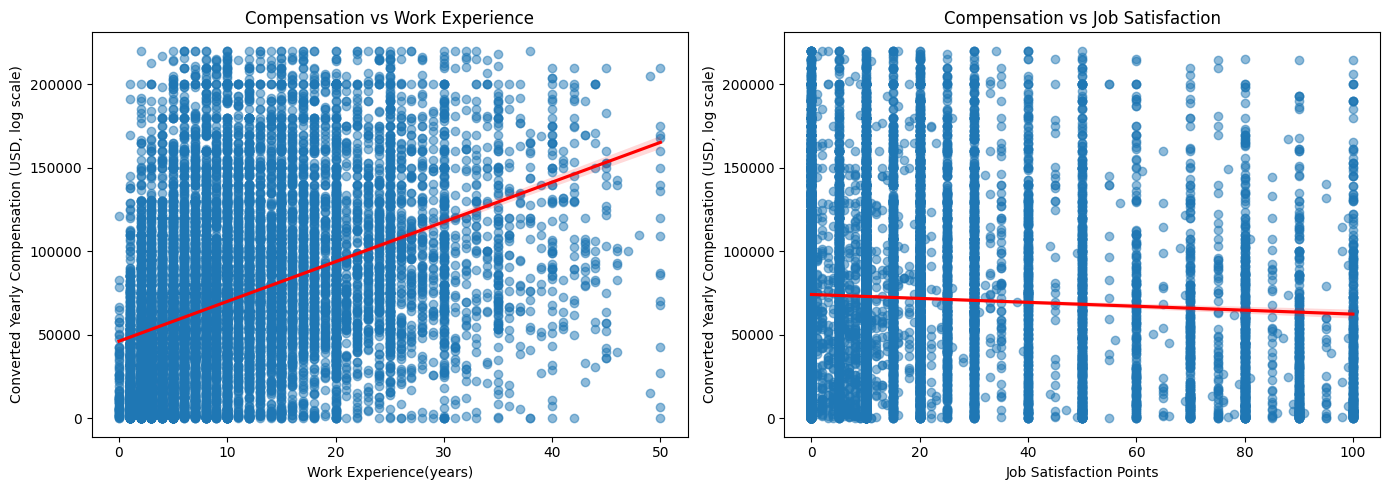

In [77]:
## Write your code here

# Set figure size
plt.figure(figsize=(14,5))

# Scatter 1: Compensation vs Work Experience
plt.subplot(1, 2, 1)
sns.regplot(
    x='WorkExp',
    y='ConvertedCompYearly',
    data=df_comp_no_outliers,
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
#plt.yscale('log')
plt.xlabel('Work Experience(years)')
plt.ylabel('Converted Yearly Compensation (USD, log scale)')
plt.title('Compensation vs Work Experience')

# Scatter 2: Compensation vs Job Satisfaction
plt.subplot(1, 2, 2)
sns.regplot(
    x='JobSatPoints_1',
    y='ConvertedCompYearly',
    data=df_comp_no_outliers,
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
#plt.yscale('log')
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Converted Yearly Compensation (USD, log scale)')
plt.title('Compensation vs Job Satisfaction')

plt.tight_layout()
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
